In [15]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [16]:
# loading the dataset
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [17]:
# dropping the address column
ds.drop('Address',axis=1,inplace=True)

In [18]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [19]:
# scaling the dataset using minmaxscaler
scaler = MinMaxScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds),columns=ds.columns)

In [20]:
ds_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [21]:
# assigning the features and target
X = ds_scaled.drop('Price',axis=1)
y = ds_scaled['Price']

In [22]:
# splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [23]:
# performing the random forest regression
RFR = RandomForestRegressor(n_estimators=100,random_state=42)
RFR.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = RFR.predict(X_test)

In [25]:
# printing the metrics
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:', r2_score(y_test,y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.0023532866020559034
R2 Score: 0.8830793725917364
Mean Absolute Error: 0.03848564581112351


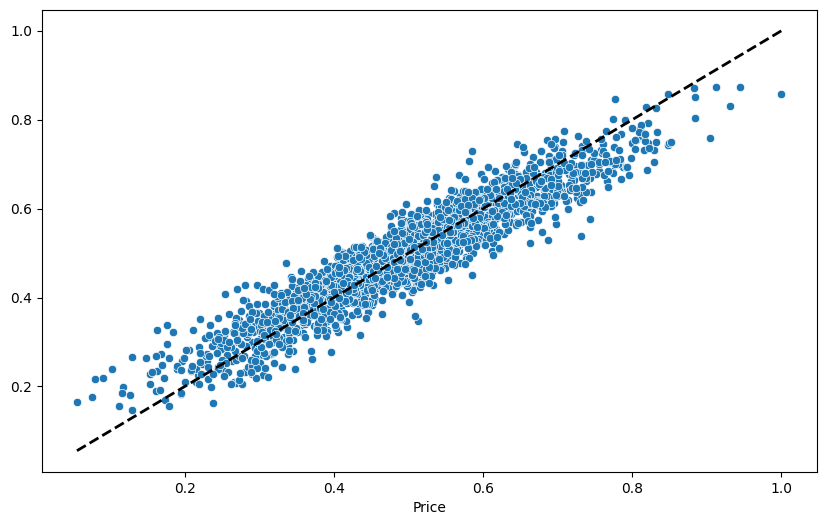

In [26]:
#plotting
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)

In [27]:
y_pred1 = RFR.predict(X_train)

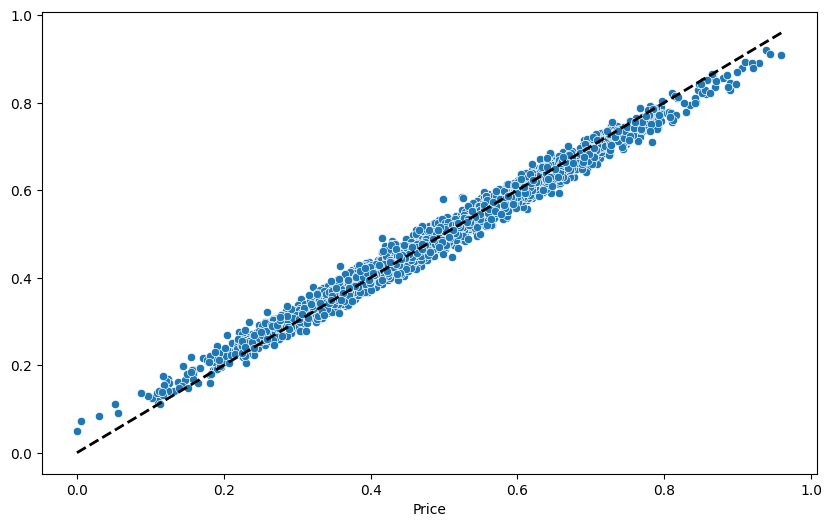

In [28]:
# plotting
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train,y=y_pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=2)